# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 
Download the data from [here](https://drive.google.com/file/d/1o-vZHHSywBksnPuGRunvpdYN7grYbe8h/view?usp=sharing) and place it in the data folder

In [30]:
# Your code here
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [31]:
housing = pd.read_csv('../data/boston_data.csv')

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [32]:
# Your plots here
# Well it is hard to choose which variables when some variables are not explicit or clear what they represent.
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [33]:
reg = LinearRegression().fit(np.vstack(housing['crim']), housing['medv'])
bestfit_crim = reg.predict(np.vstack(housing['crim']))
fig = go.Figure()
fig.add_trace(go.Scatter(x=housing['crim'], y=housing['medv'], mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=housing['crim'], y=bestfit_crim, mode='lines'))
fig.show()

reg = LinearRegression().fit(np.vstack(housing['tax']), housing['medv'])
bestfit_tax = reg.predict(np.vstack(housing['tax']))
fig = go.Figure()
fig.add_trace(go.Scatter(x=housing['tax'], y=housing['medv'], mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=housing['tax'], y=bestfit_tax, mode='lines'))
fig.show()


reg = LinearRegression().fit(np.vstack(housing['indus']), housing['medv'])
bestfit_indus = reg.predict(np.vstack(housing['indus']))
fig = go.Figure()
fig.add_trace(go.Scatter(x=housing['indus'], y=housing['medv'], mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=housing['indus'], y=bestfit_indus, mode='lines'))
fig.show()

reg = LinearRegression().fit(np.vstack(housing['zn']), housing['medv'])
bestfit_zn = reg.predict(np.vstack(housing['zn']))
fig = go.Figure()
fig.add_trace(go.Scatter(x=housing['zn'], y=housing['medv'], mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=housing['zn'], y=bestfit_zn, mode='lines'))
fig.show()


In [34]:
#Paolo: ok what are you plotting though?  It would be good to add labels to the axes

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [35]:
# Your response here
# Crimes, taxes and industry have a negative correlation with the average price, which was to be expected.
# zn on the other had has a positive correlation, I am not sure why. Im not really sure what zn means, I thought it
# was ZONE or something, and the closer to 0 then the closer to the city center (which normally is good, at least in
# the vast majority of european cities), So I wouldve guess a negative correlation also, but thats not the case.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

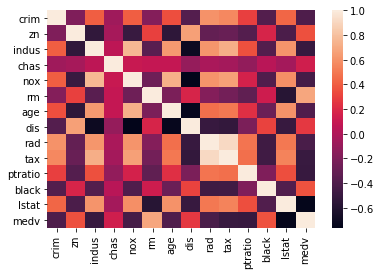

In [36]:
# Your response here
sns.heatmap(housing.corr())

In [37]:
# black and chas have a lightly positive correlation. Rm on the other hand has a strong positive correlation

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [38]:
# Your code here
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [39]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [40]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(housing.drop('medv', axis=1), housing['medv'], test_size=0.2)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [54]:
# Five separate RFR here with the given max depths
housing_model_2 = RandomForestRegressor(max_depth=2)
housing_model_4 = RandomForestRegressor(max_depth=4)
housing_model_6 = RandomForestRegressor(max_depth=6)
housing_model_8 = RandomForestRegressor(max_depth=8)
housing_model_10 = RandomForestRegressor(max_depth=10)

Now, plot the score for each tree on the training set and on the testing set.

In [56]:
# Produce a plot with the score for the testing and training for the different max depths
train = []
train.append(housing_model_2.fit(X_train, y_train).score(X_train, y_train))
train.append(housing_model_4.fit(X_train, y_train).score(X_train, y_train))
train.append(housing_model_6.fit(X_train, y_train).score(X_train, y_train))
train.append(housing_model_8.fit(X_train, y_train).score(X_train, y_train))
train.append(housing_model_10.fit(X_train, y_train).score(X_train, y_train))

test = []
test.append(housing_model_2.fit(X_train, y_train).score(X_test, y_test))
test.append(housing_model_4.fit(X_train, y_train).score(X_test, y_test))
test.append(housing_model_6.fit(X_train, y_train).score(X_test, y_test))
test.append(housing_model_8.fit(X_train, y_train).score(X_test, y_test))
test.append(housing_model_10.fit(X_train, y_train).score(X_test, y_test))

max_depth = []
max_depth.append('2')
max_depth.append('4')
max_depth.append('6')
max_depth.append('8')
max_depth.append('10')

df = pd.DataFrame({'train':train, 'test':test, 'max_depth': max_depth})
fig = px.scatter(df, 
                 x="train", 
                 y="test", 
                 color="max_depth",
                 hover_data=['max_depth', 'train', 'test'])
fig.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# The more decisions are allowed, the more accurate the model is
#Paolo: ok
#Paolo: good plot, it would be interesting also to plot predicted_set vs test_set

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
# I would say the model with a max depth of 1 has a high bias since we are making big 
# assumptions on how the data behaves, while the model with 10 has a lower bias, since were not making assumptions,
# we are just adapting to the training data.
#Paolo:yes, well said

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [45]:
# Your response here
# I would say the max_depth 6 would be the optimal in between solution, since it gives us a high score without 
# compromising the bias as much as 8, 10, etc.
#Paolo:ok

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [29]:
# Your response here
# The general answer would be: NO
# Data from 1978 Real States cannot be used to accurately predict behaviour 40 years later. There are many changing
# factors (economics, inflation, politics, etc, etc)
# I dont think the features present in the data are enough (even if I dont know what some features mean), but
# I think you need many more.
# Since there are not enough features (in my opinion) i dont think the model is consistent enough to make a 
# good prediction.
#Paolo: or maybe enough features but not enough data?
# I think Real State data is very unique on time and place, so it would be difficult to apply one model on a different
# time or location. It could maybe be used to observe and extrapolate tendencies though.